# Binary Logistic Regression

### from HW5

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

In [2]:
file = open("../hw5/heart.csv")

labels = []
x = []
y = []
for line in file:
    if(len(labels) == 0):
        labels = line.split(',')
        continue
    line_arr = line.split(',')
    x.append(line_arr[:13:])
    y.append(line_arr[13::][0][0])

rand_ind = np.array(range(0, 303))
np.random.shuffle(rand_ind)

ind_test = rand_ind[200::]
ind_train = rand_ind[:200:]

x = [list(map(float,i)) for i in x]
y = list(map(float, y))


In [3]:
x_test = []
y_test = []
x_train = []
y_train = []

for i in ind_test:
    x_test.append(x[i])
    y_test.append(y[i])
    
for i in ind_train:
    x_train.append(x[i])
    y_train.append(y[i])


In [4]:
model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [5]:
errors = 0
for i in range(len(y_pred)):
    if(y_pred[i] != y_test[i]): errors += 1

test_error = errors/len(y_test)
print(test_error)

0.1941747572815534


In [6]:
k_model = LogisticRegression(max_iter=1000)
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 10)
cross_val_scores = cross_val_score(k_model, x_train, y_train, cv=k_fold)


In [7]:
val_errors = np.mean(1 - cross_val_scores)
print(val_errors)

0.16


#### Stepwise 

In [8]:
S = []
f = np.array(range(len(labels)-1))
all_errors = []
all_val_errors = []
while len(f) > 0:
    best_f = None
    best_err = 1
    best_val_err = 1
    for feat in f:
        model = LogisticRegression(max_iter=1000)
        cols_train = [[i[j] for j in S+[feat]] for i in x_train]
        cols_test = [[i[j] for j in S+[feat]] for i in x_test]
        
        model.fit(cols_train, y_train)

        y_pred = model.predict(cols_test)

        k_fold = KFold(n_splits = 5)
        cross_val_scores = cross_val_score(model, cols_train, y_train, cv=k_fold)
        val_err = np.mean(1 - cross_val_scores)

        errors = 0
        
        for i in range(len(y_pred)):
            if(y_pred[i] != y_test[i]): errors += 1

        if errors/len(y_pred) < best_err:
            best_err = errors/len(y_pred)
            best_val_err = val_err
            best_f = feat

    S.append(best_f)
    all_errors.append(best_err)
    all_val_errors.append(best_val_err)
    f = np.delete(f, np.where(f == best_f))


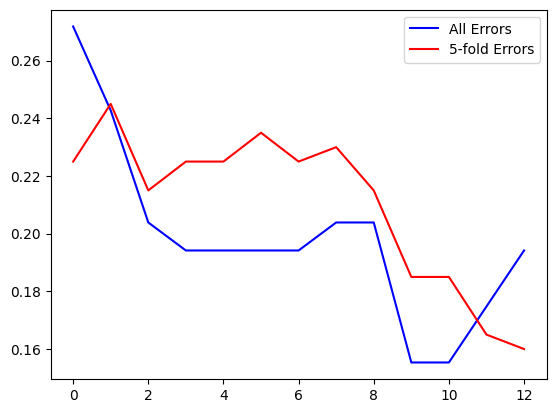

In [9]:
figure, axis = plt.subplots()
x_axis = range(0,13)
plt.plot(x_axis, all_errors, label='All Errors', color='blue')
plt.plot(x_axis, all_val_errors, label='5-fold Errors', color='red')
plt.legend()

In [10]:
[labels[j] for j in S[:2:]]

['cp', 'thalach']

# Coordinate Descent

In [11]:
def loss(x,y,w):
    loss = [0]* len(x)
    for i in range(len(x)):
        loss[i] = np.log(1 + np.exp(-1*y[i]* np.dot(w, x[i])))

        

    return np.sum(loss)

def descent(x,y, iters):
    d = len(x[0])
    w = [0]*d # init w to be vector of size d
    step = 0.000001;

    
    r = np.array(range(0, iters))
    np.random.shuffle(r)

    for i in r:
        index = i % d
        w[index] = w[index] + step * loss(x,y,w)

    return loss(x,y,w)
    
    

In [12]:
descent(x,y,1000)

96.62745025407582

In [15]:
model = LogisticRegression(max_iter = 1000)
model.fit(x, y)

y_pred = model.predict(x)

l = log_loss(y, y_pred, normalize=False)
print(l)

1658.008055899389


In [16]:
my_loss = [ descent(x,y,i) for i in range(0,10000, 100)];


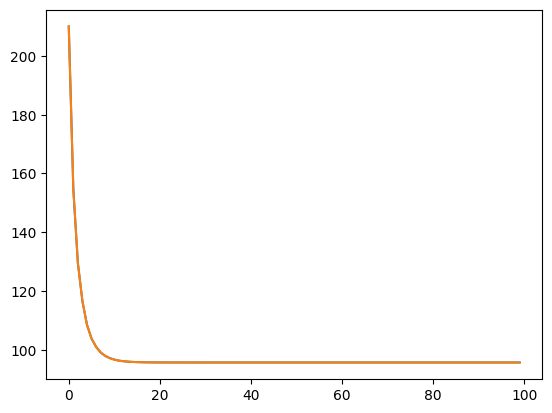

In [19]:
figure, axis = plt.subplots()
plt.plot(my_loss)
x_axis = range(0,100)
plt.plot(x_axis, my_loss)